# Bootes master catalogue

This is to run checks on the catalogue from Michael Brown. It is possible this will not be used for HELP.
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))
import datetime
print("This notebook was executed on: \n{}".format(datetime.datetime.now()))

This notebook was run with herschelhelp_internal version: 
33f5ec7 (Wed Dec 6 16:56:17 2017 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix, quick_checks

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_bootes_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_bootes_20171212.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(60, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(60, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


idx,Column,All nan,#Measurements,#Zeros,#Negative,Minimum value
0,f_ap_lbc_u,False,2076721,0,259117,-46.5348017023
1,f_ap_mosaic_bw,False,2107618,0,139480,-1.81167435646
2,f_ap_mosaic_r,False,2129385,0,95014,-33.2250862122
3,f_ap_mosaic_i,False,2205759,0,21442,-7.84405517578
4,f_ap_prime90_z,False,1711990,0,330966,-87.3088226318
5,f_ap_suprime_z,False,2039021,0,116543,-27.521648407
6,f_ap_lbc_y,False,2068415,0,282379,-88.8013411429
7,f_ap_newfirm_j,False,2184554,0,351553,-84.3257675171
8,f_ap_newfirm_h,False,2189714,0,404892,-84.5226748644
9,f_ap_onis_k,False,1159238,0,429082,-89.806364225


## I - Summary of wavelength domains

In [5]:
#TODO add flags in reformatting

#flag_obs = master_catalogue['flag_optnir_obs']
#flag_det = master_catalogue['flag_optnir_det']

In [6]:
#venn3(
#    [
#        np.sum(flag_obs == 4),
#        np.sum(flag_obs == 2),
#        np.sum(flag_obs == 6),
#        np.sum(flag_obs == 1),
#        np.sum(flag_obs == 5),
#        np.sum(flag_obs == 3),
#        np.sum(flag_obs == 7)
#    ],
#    set_labels=('Optical', 'near-IR', 'mid-IR'),
#    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
#)
#plt.title("Wavelength domain observations");

In [7]:
#venn3(
#    [
#        np.sum(flag_det[flag_obs == 7] == 4),
#        np.sum(flag_det[flag_obs == 7] == 2),
#        np.sum(flag_det[flag_obs == 7] == 6),
#        np.sum(flag_det[flag_obs == 7] == 1),
#        np.sum(flag_det[flag_obs == 7] == 5),
#        np.sum(flag_det[flag_obs == 7] == 3),
#        np.sum(flag_det[flag_obs == 7] == 7)
#    ],
#    set_labels=('mid-IR', 'near-IR', 'Optical'),
#    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
#)
#plt.title("Detection of the {} sources detected\n in any wavelength domains "
#          "(among {} sources)".format(
#              locale.format('%d', np.sum(flag_det != 0), grouping=True),
#              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
master_catalogue.colnames

['ra',
 'dec',
 'stellarity',
 'm_ap_lbc_u',
 'merr_ap_lbc_u',
 'f_ap_lbc_u',
 'ferr_ap_lbc_u',
 'm_ap_mosaic_bw',
 'merr_ap_mosaic_bw',
 'f_ap_mosaic_bw',
 'ferr_ap_mosaic_bw',
 'm_ap_mosaic_r',
 'merr_ap_mosaic_r',
 'f_ap_mosaic_r',
 'ferr_ap_mosaic_r',
 'm_ap_mosaic_i',
 'merr_ap_mosaic_i',
 'f_ap_mosaic_i',
 'ferr_ap_mosaic_i',
 'm_ap_prime90_z',
 'merr_ap_prime90_z',
 'f_ap_prime90_z',
 'ferr_ap_prime90_z',
 'm_ap_suprime_z',
 'merr_ap_suprime_z',
 'f_ap_suprime_z',
 'ferr_ap_suprime_z',
 'm_ap_lbc_y',
 'merr_ap_lbc_y',
 'f_ap_lbc_y',
 'ferr_ap_lbc_y',
 'm_ap_newfirm_j',
 'merr_ap_newfirm_j',
 'f_ap_newfirm_j',
 'ferr_ap_newfirm_j',
 'm_ap_newfirm_h',
 'merr_ap_newfirm_h',
 'f_ap_newfirm_h',
 'ferr_ap_newfirm_h',
 'm_ap_onis_k',
 'merr_ap_onis_k',
 'f_ap_onis_k',
 'ferr_ap_onis_k',
 'm_ap_newfirm_k',
 'merr_ap_newfirm_k',
 'f_ap_newfirm_k',
 'ferr_ap_newfirm_k',
 'm_ap_irac_ch1',
 'merr_ap_irac_ch1',
 'f_ap_irac_ch1',
 'ferr_ap_irac_ch1',
 'm_ap_irac_ch2',
 'merr_ap_irac_ch2',
 'f

In [9]:
u_bands = ["lbc u"]
g_bands = []
r_bands = ["Mosaic r"]
i_bands = ["Mosaic i"]
z_bands = ["PRIME90 z", "Suprime z"]
y_bands = ["lbc y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

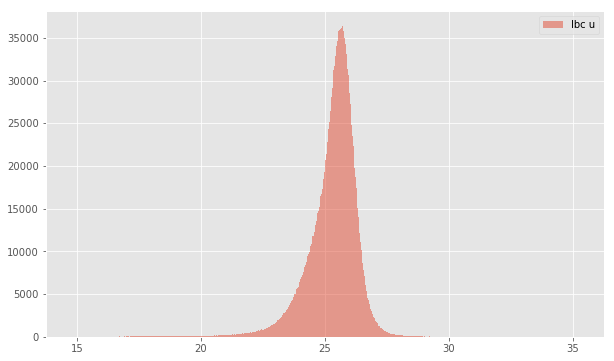

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


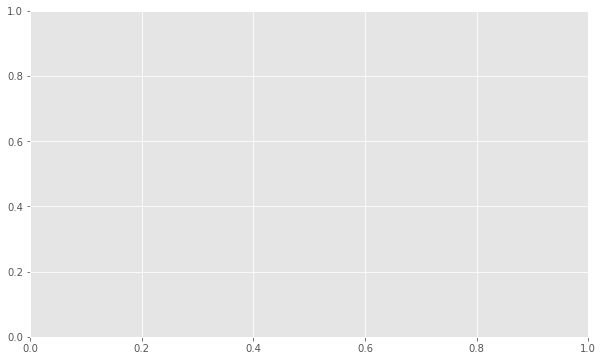

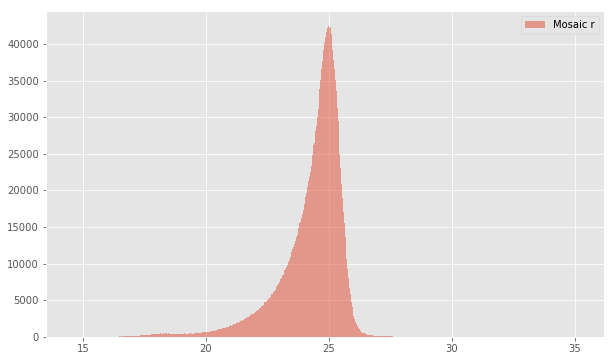

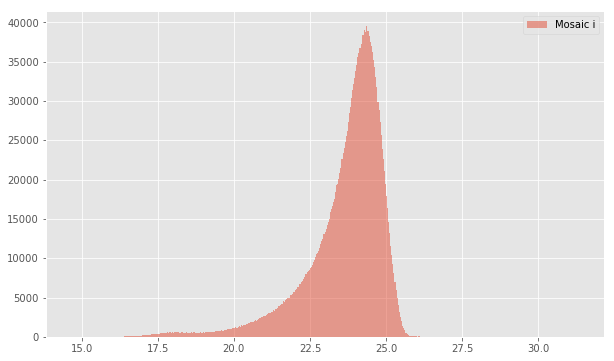

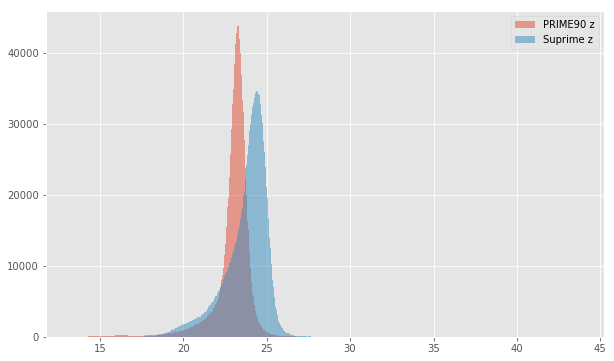

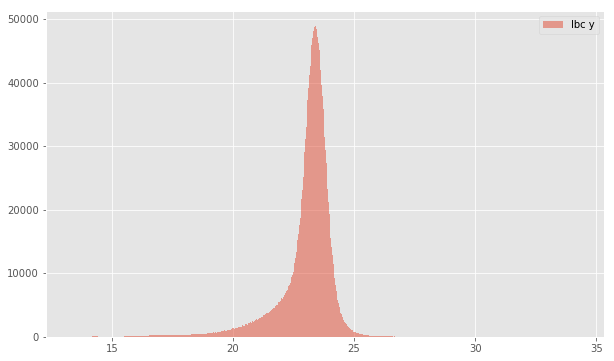

In [10]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_ap_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

Suprime z (aperture) - PRIME90 z (aperture):
- Median: 0.70
- Median Absolute Deviation: 0.58
- 1% percentile: -0.7906162536703729
- 99% percentile: 3.127203865051266


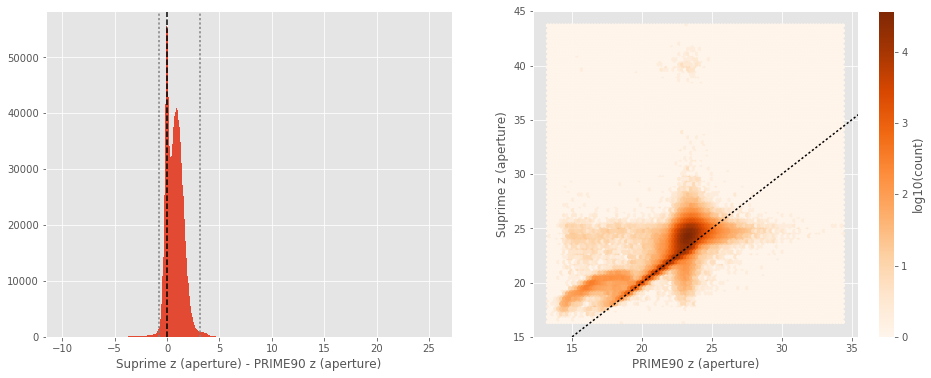

One of  m_prime90_z  and  m_suprime_z  does not exist.


In [11]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        try:
            nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        except KeyError:
            print('One of ', col1, ' and ', col2, ' does not exist.')
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        try:
            nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))
        except KeyError:
            print('One of ', col1, ' and ', col2, ' does not exist.')

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [12]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [13]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_Bootes.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

lbc u (aperture) - SDSS u (fiberMag):
- Median: 0.13
- Median Absolute Deviation: 0.48
- 1% percentile: -1.4935266494750976
- 99% percentile: 2.5912899017333997


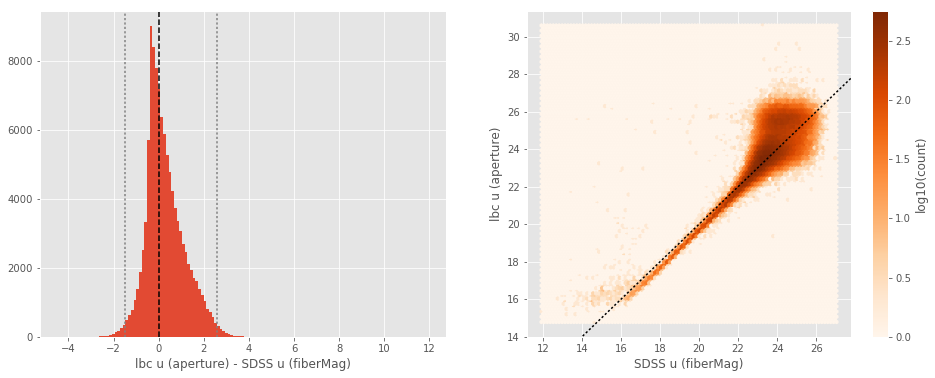

No  m_lbc_u
No sources have both SDSS u (petroMag) and lbc u (total) values.
Mosaic r (aperture) - SDSS r (fiberMag):
- Median: -0.38
- Median Absolute Deviation: 0.15
- 1% percentile: -1.2427162170410158
- 99% percentile: 2.388106526517424


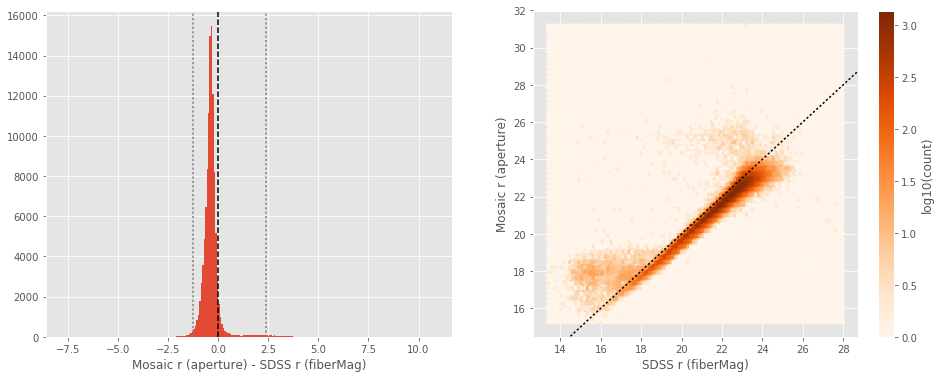

No  m_mosaic_r
No sources have both SDSS r (petroMag) and Mosaic r (total) values.
Mosaic i (aperture) - SDSS i (fiberMag):
- Median: -0.38
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1454618072509766
- 99% percentile: 1.975587410362594


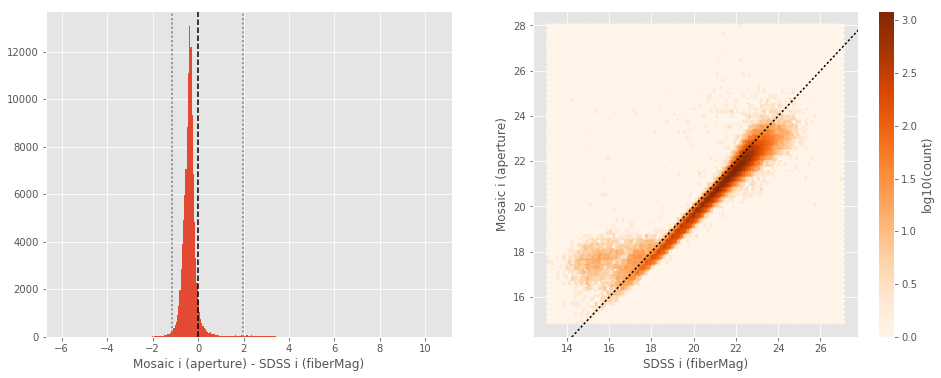

No  m_mosaic_i
No sources have both SDSS i (petroMag) and Mosaic i (total) values.
PRIME90 z (aperture) - SDSS z (fiberMag):
- Median: -0.17
- Median Absolute Deviation: 0.21
- 1% percentile: -1.2076813316345214
- 99% percentile: 2.707011108398442


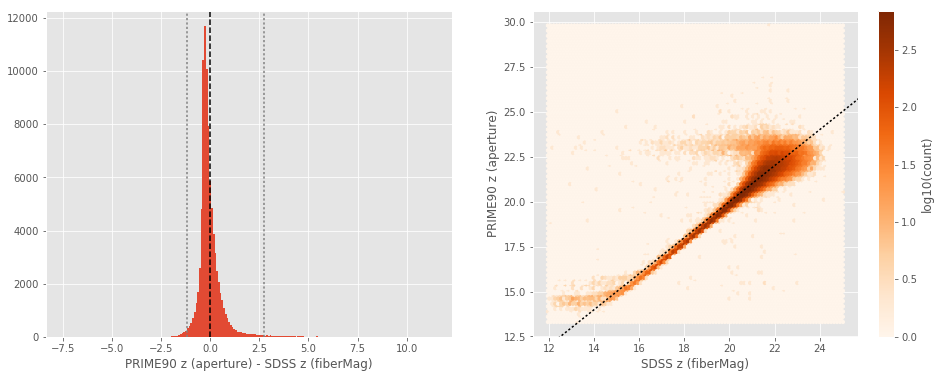

No  m_prime90_z
No sources have both SDSS z (petroMag) and PRIME90 z (total) values.
Suprime z (aperture) - SDSS z (fiberMag):
- Median: -0.09
- Median Absolute Deviation: 0.27
- 1% percentile: -1.2514193153381348
- 99% percentile: 4.580278812588574


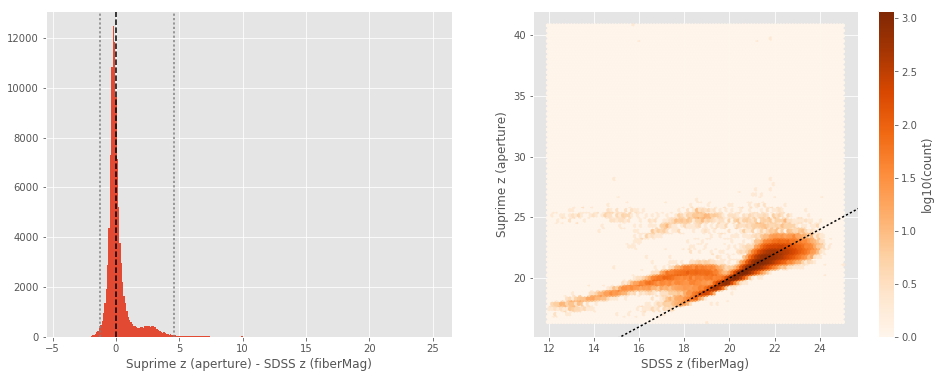

No  m_suprime_z
No sources have both SDSS z (petroMag) and Suprime z (total) values.


In [14]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        try:
            master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        except KeyError:
            print('No ', "m_ap_{}".format(band.replace(" ", "_").lower()))
            master_cat_mag_ap = np.full(len(master_catalogue), np.nan)[ml_sdss_idx]
            
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        try:
            master_cat_mag_tot = master_catalogue["m_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        except KeyError:
            print('No ', "m_{}".format(band.replace(" ", "_").lower()))
            master_cat_mag_tot = np.full(len(master_catalogue), np.nan)[ml_sdss_idx]
            
        nb_compare_mags(sdss_mag_ap, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [15]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [16]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_Bootes.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

Newfirm J (total) - 2MASS J:
- Median: 0.06
- Median Absolute Deviation: 0.08
- 1% percentile: -0.20999463988321493
- 99% percentile: 2.499920256823075


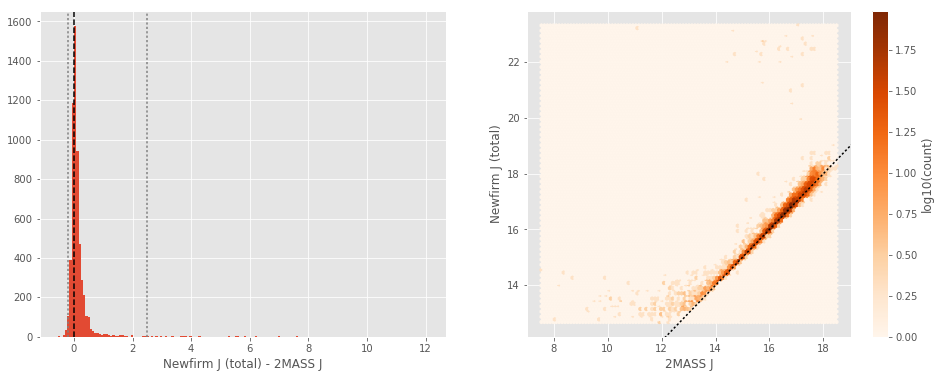

In [17]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_ap_newfirm_j'][ml_twomass_idx],
                labels=("2MASS J", "Newfirm J (total)"))

Newfirm Ks-like (total) - 2MASS Ks:
- Median: 0.09
- Median Absolute Deviation: 0.10
- 1% percentile: -0.36023741652093016
- 99% percentile: 1.6431110585128939


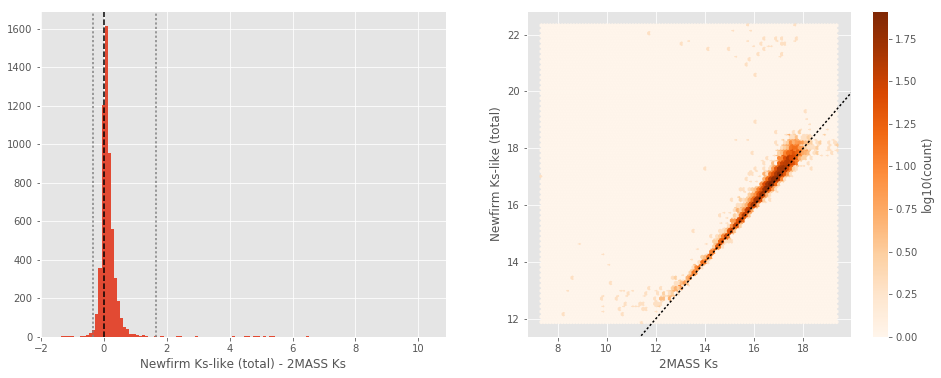

In [18]:
newfirm_ks_like = master_catalogue['m_ap_newfirm_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ap_newfirm_j'] - master_catalogue['m_ap_newfirm_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, newfirm_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "Newfirm Ks-like (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [19]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_ap_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:4: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


## V - Color-color and magnitude-color plots

Number of source used: 275707 / 2252093 (12.24%)


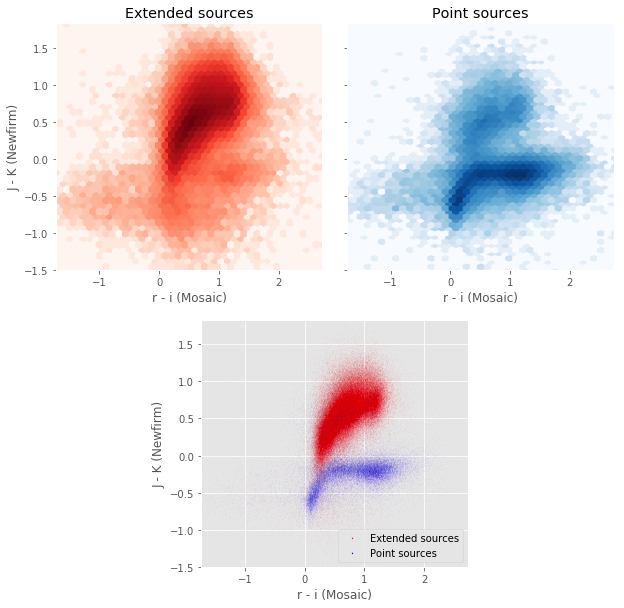

In [20]:
nb_ccplots(
    master_catalogue['m_ap_mosaic_r'] - master_catalogue['m_ap_mosaic_i'],
    master_catalogue['m_ap_newfirm_j'] - master_catalogue['m_ap_newfirm_k'],
    "r - i (Mosaic)", "J - K (Newfirm)",
    master_catalogue["stellarity"]
)

Number of source used: 406736 / 2252093 (18.06%)


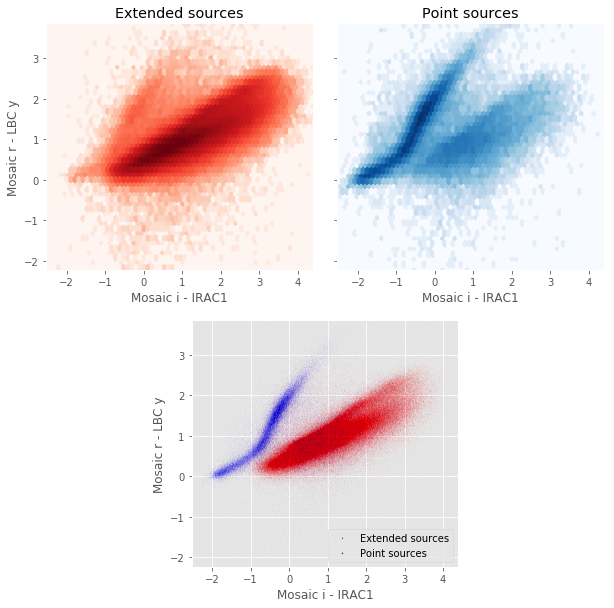

In [21]:
nb_ccplots(
    master_catalogue['m_ap_mosaic_i'] - master_catalogue['m_ap_irac_ch1'],
    master_catalogue['m_ap_mosaic_r'] - master_catalogue['m_ap_lbc_y'],
    "Mosaic i - IRAC1", "Mosaic r - LBC y",
    master_catalogue["stellarity"]
)

Number of source used: 41857 / 2252093 (1.86%)


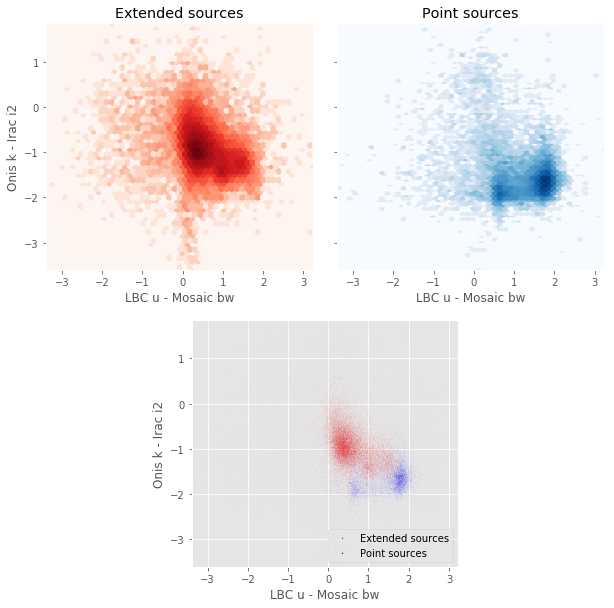

In [22]:
nb_ccplots(
    master_catalogue['m_ap_lbc_u'] - master_catalogue['m_ap_mosaic_bw'],
    master_catalogue['m_ap_onis_k'] - master_catalogue['m_ap_irac_ch2'],
    "LBC u - Mosaic bw", "Onis k - Irac i2",
    master_catalogue["stellarity"]
)

Number of source used: 74417 / 2252093 (3.30%)


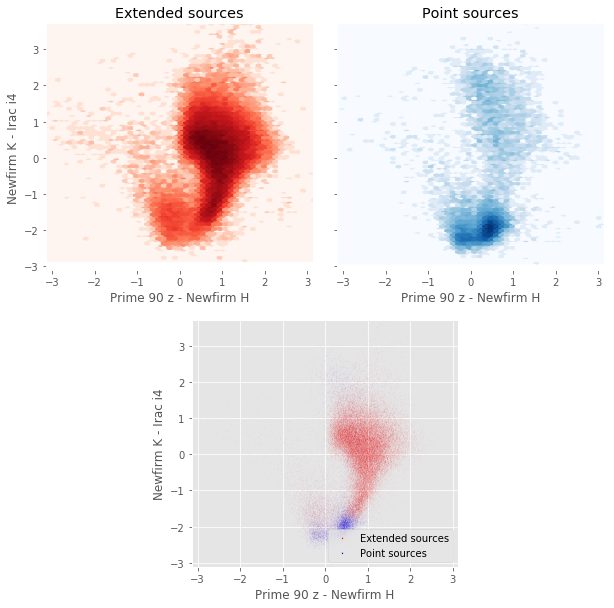

In [23]:
nb_ccplots(
    master_catalogue['m_ap_prime90_z'] - master_catalogue['m_ap_newfirm_h'],
    master_catalogue['m_ap_newfirm_k'] - master_catalogue['m_ap_irac_ch4'],
    "Prime 90 z - Newfirm H", "Newfirm K - Irac i4",
    master_catalogue["stellarity"]
)